In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

# Project
## International Airlines Traffic By City Pairs EDA Analysis 

In [2]:
df=pd.read_csv(r"c:\Users\user\Desktop\Kaggle Datasets\city_pairs.csv")

# Data Info

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89320 entries, 0 to 89319
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Month                   89320 non-null  object 
 1   AustralianPort          89320 non-null  object 
 2   ForeignPort             89320 non-null  object 
 3   Country                 89320 non-null  object 
 4   Passengers_In           89320 non-null  int64  
 5   Freight_In_(tonnes)     89320 non-null  float64
 6   Mail_In_(tonnes)        89320 non-null  float64
 7   Passengers_Out          89320 non-null  int64  
 8   Freight_Out_(tonnes)    89320 non-null  float64
 9   Mail_Out_(tonnes)       89320 non-null  float64
 10  Passengers_Total        89320 non-null  int64  
 11  Freight_Total_(tonnes)  89320 non-null  float64
 12  Mail_Total_(tonnes)     89320 non-null  float64
 13  Year                    89320 non-null  int64  
 14  Month_num               89320 non-null

In [4]:
df.shape

(89320, 15)

In [5]:
df.head()

Month AustralianPort ForeignPort      Country  Passengers_In  \
0  Jan-85       Adelaide    Auckland  New Zealand           1513   
1  Jan-85       Adelaide     Bahrain      Bahrain             12   
2  Jan-85       Adelaide      Bombay        India              7   
3  Jan-85       Adelaide   Frankfurt      Germany            115   
4  Jan-85       Adelaide      London           UK           1567   

   Freight_In_(tonnes)  Mail_In_(tonnes)  Passengers_Out  \
0               42.167             0.311             985   
1                0.000             0.000               5   
2                0.000             0.000               5   
3                0.009             0.000             171   
4                2.800             0.000            1472   

   Freight_Out_(tonnes)  Mail_Out_(tonnes)  Passengers_Total  \
0                18.704              0.924              2498   
1                 0.033              0.000                17   
2                 0.000              0.000                12   
3                 0.000              0.248               286   
4                10.618              2.487              3039   

   Freight_Total_(tonnes)  Mail_Total_(tonnes)  Year  Month_num  
0                  60.871                1.235  1985          1  
1                   0.033                0.000  1985          1  
2                   0.000                0.000  1985          1  
3                   0.009                0.248  1985          1  
4                  13.418                2.487  1985          1

# Data Handling & Cleaning

In [7]:
df.isna().sum()
df.duplicated().sum()

np.int64(0)

# EDA & Visualization

In [8]:
import plotly.express as px

# Distribution of Passengers Total
fig1 = px.histogram(df, x='Passengers_Total', nbins=50, title='Passenger Traffic Distribution')
fig1.show()

# Top 10 Australian Ports
top_ports = df.groupby('AustralianPort')['Passengers_Total'].sum().nlargest(10).reset_index()
fig2 = px.bar(top_ports, x='AustralianPort', y='Passengers_Total', title='Top 10 Australian Ports by Passenger Volume')
fig2.show()


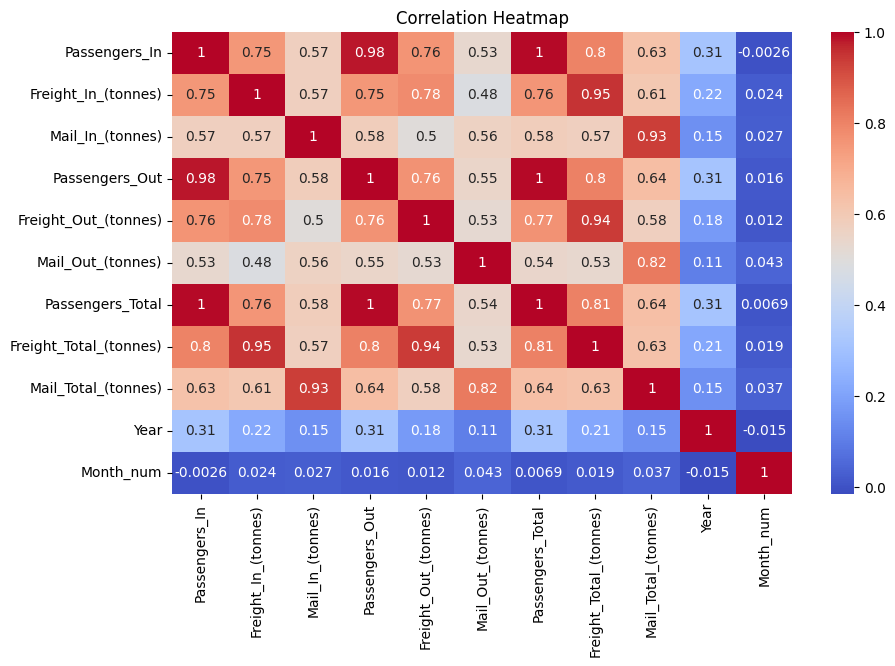

In [9]:
# Monthly trend by year
fig3 = px.line(df, x='Month', y='Passengers_Total', color='Year', title='Monthly Passenger Trends by Year')
fig3.show()

# Correlation heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [13]:
import plotly.express as px

port_comparison = df.groupby('AustralianPort')[['Passengers_In', 'Passengers_Out']].sum().reset_index()
fig = px.bar(port_comparison, x='AustralianPort', y=['Passengers_In', 'Passengers_Out'],
             title='Inbound vs Outbound Passenger Volume by Australian Port',
             barmode='group')
fig.show()


In [14]:
monthly_avg = df.groupby('Month_num')[['Freight_Total_(tonnes)', 'Mail_Total_(tonnes)']].mean().reset_index()
fig = px.line(monthly_avg, x='Month_num', y=['Freight_Total_(tonnes)', 'Mail_Total_(tonnes)'],
              title='Seasonal Trends in Freight and Mail')
fig.show()


In [15]:
country_traffic = df.groupby('Country')['Passengers_Total'].sum().nlargest(15).reset_index()
fig = px.bar(country_traffic, x='Passengers_Total', y='Country',
             orientation='h', title='Top 15 Countries by Passenger Traffic')
fig.show()


In [16]:
fig = px.bar(df, x='AustralianPort', y='Passengers_Total',
             color='Country', animation_frame='Year', range_y=[0, df['Passengers_Total'].max()],
             title='Yearly Passenger Traffic by Port')
fig.show()


In [17]:
df['Passenger_Freight_Ratio'] = df['Passengers_Total'] / (df['Freight_Total_(tonnes)'] + 1)
fig = px.box(df, x='AustralianPort', y='Passenger_Freight_Ratio',
             title='Passenger to Freight Ratio Across Ports')
fig.show()
